## EDA

In [2]:
import io
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

%matplotlib inline

import polars as pl
from skimpy import skim
from summarytools import dfSummary
#summarytools doesnt work with polars library, it works with pandas tho

#%load_ext cudf.pandas
#supercharges workflow with GPU acceleration using cudf.pandas
#Im having pip install issues with cudf so commenting it out for now

In [6]:
df = pd.read_csv('Task 1.csv')
df.head(5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606.0,301.0,2.0,79.0,6.543777e+18,GALAXY,0.634794,5812.0,56354,171.0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518.0,301.0,NaN,119.0,1.176014e+19,GALAXY,0.779136,NaN,58158,427.0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606.0,301.0,NaN,120.0,5.152200e+18,GALAXY,0.644195,NaN,55592,299.0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192.0,301.0,3.0,214.0,1.030107e+19,GALAXY,0.932346,9149.0,58039,775.0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102.0,301.0,3.0,137.0,6.891865e+18,GALAXY,0.116123,6121.0,56187,842.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        97987 non-null   float64
 2   delta        90750 non-null   float64
 3   u            99965 non-null   float64
 4   g            99785 non-null   float64
 5   r            98270 non-null   float64
 6   i            99874 non-null   float64
 7   z            99112 non-null   float64
 8   run_ID       99999 non-null   float64
 9   rerun_ID     99997 non-null   float64
 10  cam_col      74526 non-null   float64
 11  field_ID     99992 non-null   float64
 12  spec_obj_ID  99998 non-null   float64
 13  class        99996 non-null   object 
 14  redshift     99984 non-null   float64
 15  plate        87244 non-null   float64
 16  MJD          100000 non-null  int64  
 17  fiber_ID     99995 non-null   float64
dtypes: float64(16), int64(1),

In [9]:
df.shape

(100000, 18)

In [10]:
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID         float64
rerun_ID       float64
cam_col        float64
field_ID       float64
spec_obj_ID    float64
class           object
redshift       float64
plate          float64
MJD              int64
fiber_ID       float64
dtype: object

In [13]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,97987.000000,90750.000000,99965.000000,99785.000000,98270.000000,99874.000000,99112.000000,99999.000000,99997.0,74526.000000,99992.000000,9.999800e+04,99984.000000,87244.000000,100000.000000,99995.000000
mean,1.237665e+18,177.572611,24.113338,21.980389,20.531585,19.645324,19.085179,18.668293,4481.333693,301.0,3.512385,186.120590,5.783944e+18,0.576674,5137.282633,55588.647500,449.308375
std,8.438560e+12,96.504049,19.650086,31.774821,31.784318,1.855572,1.757937,31.869522,1964.747757,0.0,1.587151,149.001349,3.324020e+18,0.730737,2950.877918,1808.484233,272.503122
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.471943,5.119385,20.352300,18.966220,18.133965,17.732608,17.461787,3187.000000,301.0,2.000000,82.000000,2.844139e+18,0.054503,2527.000000,54234.000000,221.000000
50%,1.237663e+18,180.802203,23.574816,22.179130,21.099690,20.125750,19.405385,19.004650,4188.000000,301.0,4.000000,146.000000,5.614897e+18,0.424173,4983.000000,55868.500000,433.000000
75%,1.237668e+18,233.889947,39.885515,23.687400,22.123740,21.044522,20.396653,19.921083,5326.000000,301.0,5.000000,241.000000,8.332586e+18,0.704154,7403.000000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [16]:
# Better Describe Method than pandas describe
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 100000 │ │ float64     │ 16    │                                                          │
│ │ Number of columns │ 18     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column  ┃ NA    ┃ NA %   ┃ mean    ┃ sd      ┃ p0       ┃ p25     ┃ p50      ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ obj_ID  │     0 │      0 │ 1.238e+ │ 8439000 │ 1.238e+1 │ 1.238e+ │ 1.238e+1 │ 1.238e+ │ 1.238e+1 │ ▁▃▇▇▂▅ │  │
│ │         │       │        │      18 │  000000 │        8 │      18 │        8 │      18 │        8 │        │  │
│ │ alpha   │  2013 │  2.013 │   177.6 │    96.5 │ 0.005528 │   127.5 │    180.8 │   233.9 │      360 │ ▅▁▇▇▂▃ │  │
│ │ delta   │  9250 │   9.25 │   24.11 │   19.65 │   -18.79 │   5.119 │    23.57 │   39.89 │       83 │ ▂▇▇▆▃  │  │
│ │ u       │    35 │  0.035 │   21.98 │   31.77 │    -9999 │   20.35 │    22.18 │   23.69 │    32.78 │      ▇ │  │
│ │ g       │   215 │  0.215 │   20.53 │   31.78 │    -9999 │   18.97 │     21.1 │   22.12 │     31.6 │      ▇ │  │
│ │ r       │  1730 │   1.73 │   19.65 │   1.856 │    9.822 │   18.13 │    20.13 │   21.04 │    29.57 │   ▁▅▇  │  │
│ │ i       │   126 │  0.126 │   19.09 │   1.758 │     9.47 │   17.73 │    19.41 │    20.4 │    32.14 │   ▂▇▂  │  │
│ │ z       │   888 │  0.888 │   18.67 │   31.87 │    -9999 │   17.46 │       19 │   19.92 │    29.38 │      ▇ │  │
│ │ run_ID  │     1 │  0.001 │    4481 │    1965 │      109 │    3187 │     4188 │    5326 │     8162 │ ▁▃▇▇▂▅ │  │
│ │ rerun_I │     3 │  0.003 │     301 │       0 │      301 │     301 │      301 │     301 │      301 │     ▇  │  │
│ │ D       │       │        │         │         │          │         │          │         │          │        │  │
│ │ cam_col │ 25474 │ 25.474 │   3.512 │   1.587 │        1 │       2 │        4 │       5 │        6 │ ▅▇▇▇▇▅ │  │
│ │ field_I │     8 │  0.008 │   186.1 │     149 │       11 │      82 │      146 │     241 │      989 │  ▇▃▁   │  │
│ │ D       │       │        │         │         │          │         │          │         │          │        │  │
│ │ spec_ob │     2 │  0.002 │ 5.784e+ │ 3.324e+ │ 2.995e+1 │ 2.844e+ │ 5.615e+1 │ 8.333e+ │ 1.413e+1 │ ▇▇▇▇▃▂ │  │
│ │ j_ID    │       │        │      18 │      18 │        7 │      18 │        8 │      18 │        9 │        │  │
│ │ redshif │    16 │  0.016 │  0.5767 │  0.7307 │ -0.00997 │  0.0545 │   0.4242 │  0.7042 │    7.011 │   ▇▁   │  │
│ │ t       │       │        │         │         │        1 │         │          │         │          │        │  │
│ │ plate   │ 12756 │ 12.756 │    5137 │    2951 │      266 │    2527 │     4983 │    7403 │    12550 │ ▇▇▇▇▃▂ │  │
│ │ MJD     │     0 │      0 │   55590 │    1808 │    51610 │   54230 │    55870 │   56780 │    58930 │ ▃▃▃▇▃▃ │  │
│ │ fiber_I │     5 │  0.005 │   449.3 │   272.5 │      

In [14]:
df.isnull().sum()   

obj_ID             0
alpha           2013
delta           9250
u                 35
g                215
r               1730
i                126
z                888
run_ID             1
rerun_ID           3
cam_col        25474
field_ID           8
spec_obj_ID        2
class              4
redshift          16
plate          12756
MJD                0
fiber_ID           5
dtype: int64

In [ ]:
df.isna().sum().sort_values(ascending=False)
# cam_col has 25474/100000 missing values - approx 25.5%

cam_col        25474
plate          12756
delta           9250
alpha           2013
r               1730
z                888
g                215
i                126
u                 35
redshift          16
field_ID           8
fiber_ID           5
class              4
rerun_ID           3
spec_obj_ID        2
run_ID             1
obj_ID             0
MJD                0
dtype: int64

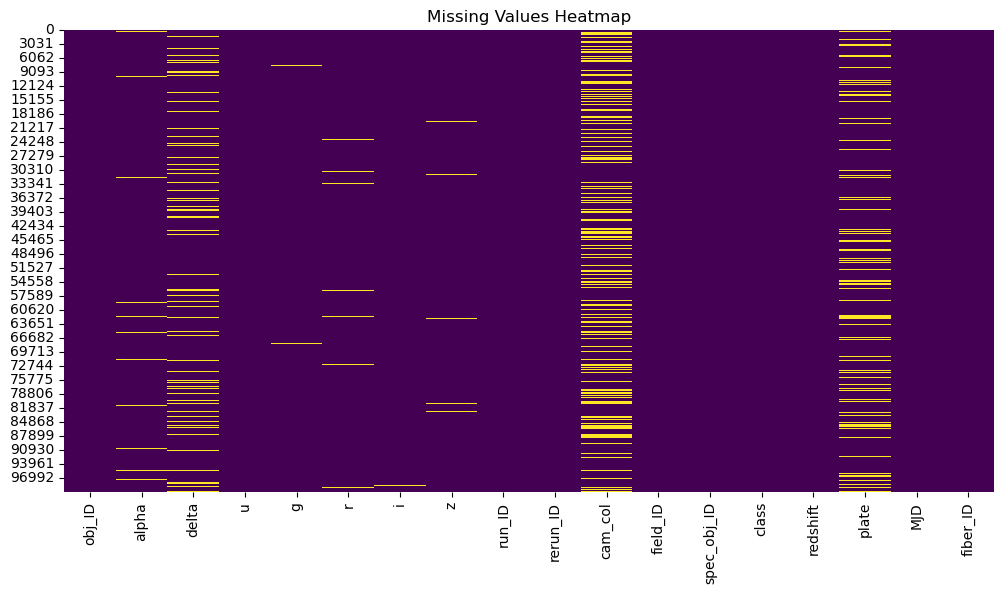

In [18]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [19]:
# WHAT DOES ANY OF THE COLUMN MEAN BRO WTF????
# Name of all the columns listed below
df.columns.tolist()

['obj_ID',
 'alpha',
 'delta',
 'u',
 'g',
 'r',
 'i',
 'z',
 'run_ID',
 'rerun_ID',
 'cam_col',
 'field_ID',
 'spec_obj_ID',
 'class',
 'redshift',
 'plate',
 'MJD',
 'fiber_ID']

In [23]:
'''Here are the meanings of the columns you listed, based on common astronomical survey datasets (such as SDSS):

obj_ID: Unique object identifier.
alpha: Right Ascension (RA) in degrees (celestial longitude).
delta: Declination (Dec) in degrees (celestial latitude).
u, g, r, i, z: Magnitudes in the SDSS photometric bands (ultraviolet, green, red, near-infrared, and infrared).
run_ID: Identifier for the imaging run.
rerun_ID: Identifier for the data processing rerun.
cam_col: Camera column (which CCD column was used).
field_ID: Field number within the run.
spec_obj_ID: Unique identifier for the spectroscopic observation.
class: Object class (e.g., STAR, GALAXY, QSO).
redshift: Redshift value (z), indicating how much the object's light has been stretched by the expansion of the universe.
plate: Spectroscopic plate number.
MJD: Modified Julian Date of the observation.
fiber_ID: Fiber number on the spectroscopic plate.

These columns are typical in astronomical datasets for classifying and analyzing celestial objects.'''

"Here are the meanings of the columns you listed, based on common astronomical survey datasets (such as SDSS):\n\nobj_ID: Unique object identifier.\nalpha: Right Ascension (RA) in degrees (celestial longitude).\ndelta: Declination (Dec) in degrees (celestial latitude).\nu, g, r, i, z: Magnitudes in the SDSS photometric bands (ultraviolet, green, red, near-infrared, and infrared).\nrun_ID: Identifier for the imaging run.\nrerun_ID: Identifier for the data processing rerun.\ncam_col: Camera column (which CCD column was used).\nfield_ID: Field number within the run.\nspec_obj_ID: Unique identifier for the spectroscopic observation.\nclass: Object class (e.g., STAR, GALAXY, QSO).\nredshift: Redshift value (z), indicating how much the object's light has been stretched by the expansion of the universe.\nplate: Spectroscopic plate number.\nMJD: Modified Julian Date of the observation.\nfiber_ID: Fiber number on the spectroscopic plate.\n\nThese columns are typical in astronomical datasets for